**Outline:**

* [Scaling or Normalization](#Scaling-or-Normalization)
* [Parsing Dates](#Parsing-Dates)
* [Handling Missing Data](#Handling-Missing-Data)

In [1]:
import pandas as pd

## Scaling or Normalization

In [3]:
data = {
    'data': [2, 3, 4, 10, 12, 20, 30, 11, 25]
}
df = pd.DataFrame(data)

In [5]:
df

,data
0,2
1,3
2,4
3,10
4,12
5,20
6,30
7,11
8,25


### Rescaling (Min-Max Normalization)

$x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}$

where $x$ is an original value, $x'$ is the normalized value.

In [8]:
df['min_max_normalization'] = (df['data'] - df['data'].min()) / (df['data'].max() - df['data'].min())

In [9]:
df

,data,min_max_normalization
0,2,0.000000
1,3,0.035714
2,4,0.071429
3,10,0.285714
4,12,0.357143
5,20,0.642857
6,30,1.000000
7,11,0.321429
8,25,0.821429


### Mean Normalization

$x' = \frac{x - \text{average}(x)}{\text{max}(x)-\text{min}(x)}$

where $x$ is an original value, $x'$ is the normalized value.

In [10]:
df['mean_normalization'] = (df['data'] - df['data'].mean()) / (df['data'].max() - df['data'].min())

In [11]:
df

,data,min_max_normalization,mean_normalization
0,2,0.000000,-0.392857
1,3,0.035714,-0.357143
2,4,0.071429,-0.321429
3,10,0.285714,-0.107143
4,12,0.357143,-0.035714
5,20,0.642857,0.250000
6,30,1.000000,0.607143
7,11,0.321429,-0.071429
8,25,0.821429,0.428571


### Standardization (z-Scaling)

$x' = \frac{x - \bar{x}}{\sigma}$

where $x$ is the original feature vector, $\bar{x} = \text{average}(x)$ is the mean of that feature vector, and $\sigma$ is its standard deviation.

In [12]:
df['stanardization'] = (df['data'] - df['data'].mean()) / df['data'].std()

In [13]:
df

,data,min_max_normalization,mean_normalization,stanardization
0,2,0.000000,-0.392857,-1.101378
1,3,0.035714,-0.357143,-1.001252
2,4,0.071429,-0.321429,-0.901127
3,10,0.285714,-0.107143,-0.300376
4,12,0.357143,-0.035714,-0.100125
5,20,0.642857,0.250000,0.700877
6,30,1.000000,0.607143,1.702129
7,11,0.321429,-0.071429,-0.200250
8,25,0.821429,0.428571,1.201503


### Scaling to Unit Length

$x' = \frac{x}{||x||}$

In [17]:
import numpy as np

In [18]:
df['squared'] = np.square(df['data'])
df['unit_length'] = df['data'] / np.sqrt(df['squared'].sum())

In [19]:
df

,data,min_max_normalization,mean_normalization,stanardization,unit_length,squared
0,2,0.000000,-0.392857,-1.101378,0.041532,4
1,3,0.035714,-0.357143,-1.001252,0.062298,9
2,4,0.071429,-0.321429,-0.901127,0.083063,16
3,10,0.285714,-0.107143,-0.300376,0.207658,100
4,12,0.357143,-0.035714,-0.100125,0.249190,144
5,20,0.642857,0.250000,0.700877,0.415317,400
6,30,1.000000,0.607143,1.702129,0.622975,900
7,11,0.321429,-0.071429,-0.200250,0.228424,121
8,25,0.821429,0.428571,1.201503,0.519146,625


## Parsing Dates

## Handling Missing Data

In [8]:
import pandas as pd

In [9]:
titanic = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.csv')

In [ ]:
titanic.info()

In [ ]:
titanic.shape

In [ ]:
titanic.head()

In [ ]:
titanic.isnull().head()

In [ ]:
titanic.notnull().head()

In [ ]:
titanic.isnull().sum()

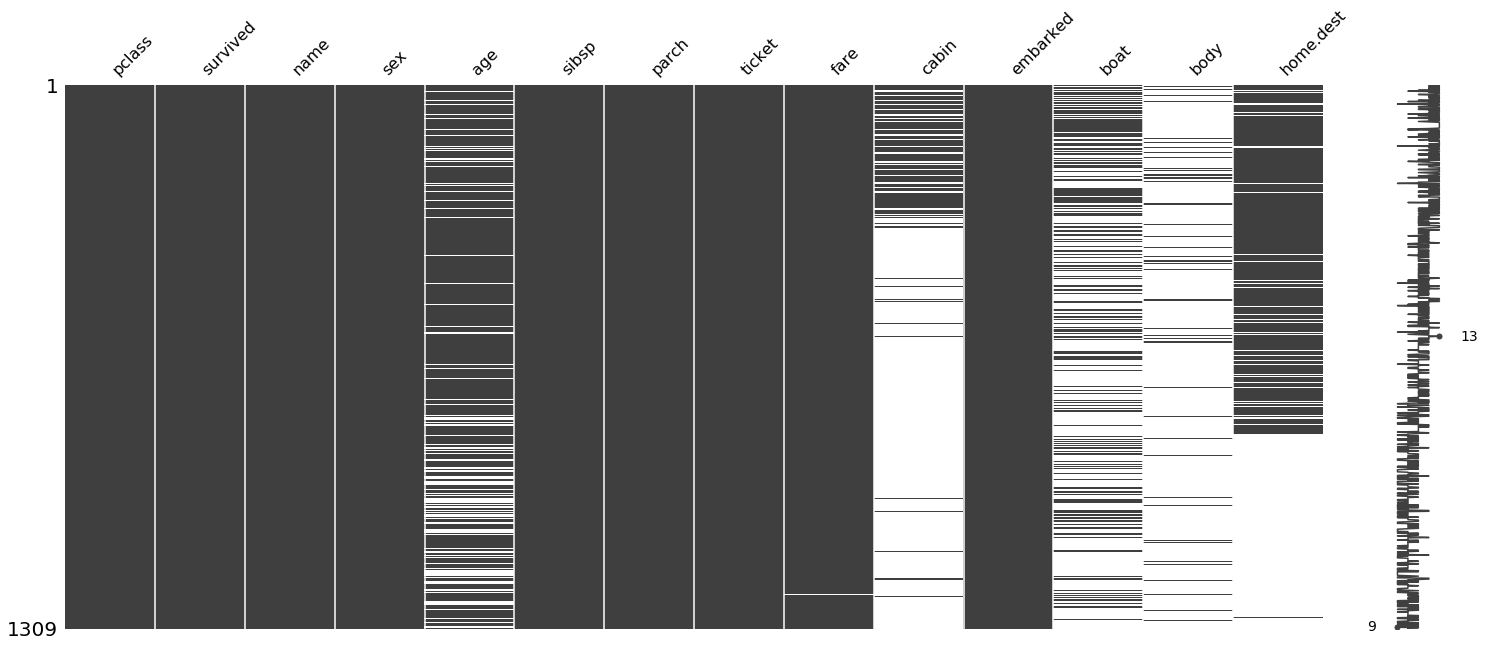

In [10]:
import missingno as msno
%matplotlib inline
msno.matrix(titanic)

In [ ]:
titanic.drop('body', axis=1).dropna().shape

In [ ]:
titanic.dropna(subset=['age', 'body'], how='any').shape

In [ ]:
titanic.dropna(subset=['age', 'body'], how='all').shape

In [ ]:
body_mean = titanic.body.mean()

In [ ]:
titanic.body = titanic.body.fillna(body_mean).head()

In [ ]:
titanic.head()

In [ ]:
titanic.cabin.value_counts(dropna=False).head()

In [ ]:
titanic.cabin.fillna('C23 C25 C27').value_counts().head()